# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import os
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [4]:
record_count = 0
set_count = 1

#URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q="
    response = requests.get(query_url + city).json()
    if record_count < 50:
        record_count += 1
    else:
        set_count += 1
        record_count = 0

    print('Processing record {} of set {} | {}'.format(record_count, set_count, city))
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found. Skipping...")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 1 | lompoc
Processing record 2 of set 1 | banjar
Processing record 3 of set 1 | taolanaro
City not found. Skipping...
Processing record 4 of set 1 | hermanus
Processing record 5 of set 1 | rio grande
Processing record 6 of set 1 | seoul
Processing record 7 of set 1 | bredasdorp
Processing record 8 of set 1 | quatre cocos
Processing record 9 of set 1 | mataura
Processing record 10 of set 1 | hilo
Processing record 11 of set 1 | avarua
Processing record 12 of set 1 | umzimvubu
City not found. Skipping...
Processing record 13 of set 1 | talara
Processing record 14 of set 1 | rikitea
Processing record 15 of set 1 | leningradskiy
Processing record 16 of set 1 | kaitangata
Processing record 17 of set 1 | alofi
Processing record 18 of set 1 | ushuaia
Processing record 19 of set 1 | coquimbo
Processing record 20 of set 1 | cordoba
Processing record 21 of set 1 | georgetown
Processing record 22

Processing record 34 of set 4 | salamiyah
Processing record 35 of set 4 | funza
Processing record 36 of set 4 | cayenne
Processing record 37 of set 4 | porterville
Processing record 38 of set 4 | beboto
Processing record 39 of set 4 | anito
Processing record 40 of set 4 | malanje
Processing record 41 of set 4 | rocha
Processing record 42 of set 4 | ilulissat
Processing record 43 of set 4 | khatanga
Processing record 44 of set 4 | baykit
Processing record 45 of set 4 | tarauaca
Processing record 46 of set 4 | olot
Processing record 47 of set 4 | zalantun
Processing record 48 of set 4 | artyk
City not found. Skipping...
Processing record 49 of set 4 | mount gambier
Processing record 50 of set 4 | torbay
Processing record 0 of set 5 | senekal
Processing record 1 of set 5 | isangel
Processing record 2 of set 5 | neenah
Processing record 3 of set 5 | whyalla
Processing record 4 of set 5 | borisovka
Processing record 5 of set 5 | katsuura
Processing record 6 of set 5 | birao
Processing recor

Processing record 21 of set 8 | tadine
Processing record 22 of set 8 | evensk
Processing record 23 of set 8 | constitucion
Processing record 24 of set 8 | sambava
Processing record 25 of set 8 | marystown
Processing record 26 of set 8 | provideniya
Processing record 27 of set 8 | bantry
Processing record 28 of set 8 | turukhansk
Processing record 29 of set 8 | labrea
Processing record 30 of set 8 | mporokoso
Processing record 31 of set 8 | takoradi
Processing record 32 of set 8 | solhan
Processing record 33 of set 8 | peniche
Processing record 34 of set 8 | marshalltown
Processing record 35 of set 8 | jiayuguan
Processing record 36 of set 8 | sorland
Processing record 37 of set 8 | prachuap khiri khan
Processing record 38 of set 8 | okato
Processing record 39 of set 8 | alamor
Processing record 40 of set 8 | garowe
Processing record 41 of set 8 | baghdad
Processing record 42 of set 8 | los llanos de aridane
Processing record 43 of set 8 | haibowan
City not found. Skipping...
Processing

Processing record 3 of set 12 | ushumun
Processing record 4 of set 12 | shymkent
Processing record 5 of set 12 | cairns
Processing record 6 of set 12 | zaysan
Processing record 7 of set 12 | lebedinyy
Processing record 8 of set 12 | rock sound
Processing record 9 of set 12 | weymouth
Processing record 10 of set 12 | gimli
Processing record 11 of set 12 | uribia
Processing record 12 of set 12 | ola
Processing record 13 of set 12 | port blair
Processing record 14 of set 12 | esso
Processing record 15 of set 12 | mineral wells
Processing record 16 of set 12 | birobidzhan
Processing record 17 of set 12 | itamaraju
Processing record 18 of set 12 | jalu
Processing record 19 of set 12 | brindisi
Processing record 20 of set 12 | kamenka
Processing record 21 of set 12 | bac lieu
Processing record 22 of set 12 | berdigestyakh
Processing record 23 of set 12 | qinhuangdao
Processing record 24 of set 12 | komsomolskiy
Processing record 25 of set 12 | harper
Processing record 26 of set 12 | tawang
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather = {
    "City":new_cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness, 
    "Wind Speed": wind,
    "Country": country, 
    "Date":date  
}
weather_df = pd.DataFrame(weather)
weather_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.64,-120.46,69.01,64,10,10.29,US,1595622657
1,banjar,-8.19,114.97,77.00,78,40,13.87,ID,1595622658
2,hermanus,-34.42,19.23,50.00,84,0,1.92,ZA,1595622658
3,rio grande,-32.03,-52.10,55.40,87,90,18.34,BR,1595622480
4,seoul,37.57,126.98,73.40,69,90,4.70,KR,1595622600


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
clean_city_data= weather_df.loc[weather_df["Humidity"] < 100] 
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.64,-120.46,69.01,64,10,10.29,US,1595622657
1,banjar,-8.19,114.97,77.00,78,40,13.87,ID,1595622658
2,hermanus,-34.42,19.23,50.00,84,0,1.92,ZA,1595622658
3,rio grande,-32.03,-52.10,55.40,87,90,18.34,BR,1595622480
4,seoul,37.57,126.98,73.40,69,90,4.70,KR,1595622600


In [8]:
cleaned_city_data = clean_city_data.set_index("City")
cleaned_city_data.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
lompoc,34.64,-120.46,69.01,64,10,10.29,US,1595622657
banjar,-8.19,114.97,77.00,78,40,13.87,ID,1595622658
hermanus,-34.42,19.23,50.00,84,0,1.92,ZA,1595622658
rio grande,-32.03,-52.10,55.40,87,90,18.34,BR,1595622480
seoul,37.57,126.98,73.40,69,90,4.70,KR,1595622600


In [25]:
# Export the City_Data into a csv
outputPath = os.path.join('output_data','city_data.csv')

with open(outputPath, 'w') as datafile:
    cleaned_city_data.to_csv(outputPath)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
date= datetime.datetime.fromtimestamp(int(clean_city_data['Date'][0])).strftime('%m/%d/%Y')

## Latitude vs. Temperature Plot

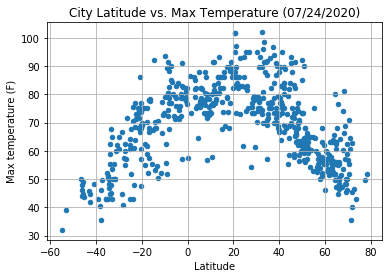

In [11]:
clean_city_data.plot(kind='scatter', x='Lat', y='Max Temp')
plt.title('City Latitude vs. Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("Images/LatitudevsTemperature.png")

## Latitude vs. Humidity Plot

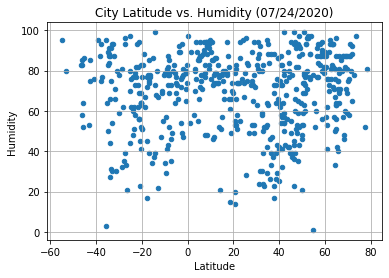

In [12]:
clean_city_data.plot(kind='scatter', x='Lat', y='Humidity')
plt.title('City Latitude vs. Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("Images/LatitudevsHumidity.png")

## Latitude vs. Cloudiness Plot

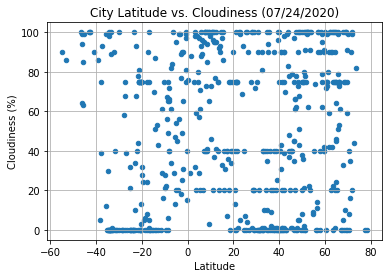

In [13]:
clean_city_data.plot(kind='scatter',x='Lat',y='Cloudiness')
plt.title('City Latitude vs. Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Images/LatitudevsCloudiness.png")

## Latitude vs. Wind Speed Plot

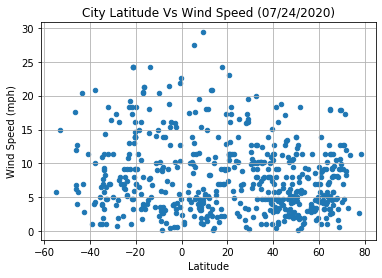

In [14]:
clean_city_data.plot(kind='scatter',x='Lat',y='Wind Speed')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Images/LatitudevsWindSpeed.png")

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
southern_df = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] <= 0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

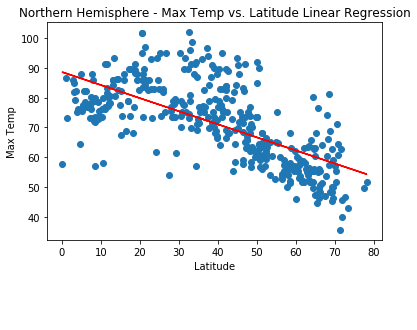

The r-squared is: -0.6678375460311409


<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Northern_MaxTempvsLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

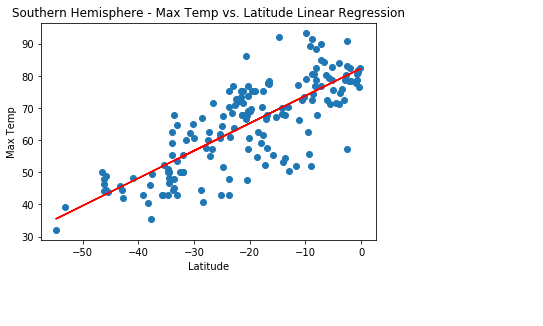

The r-squared is: 0.7831722602949913


<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Southern_MaxTempvsLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

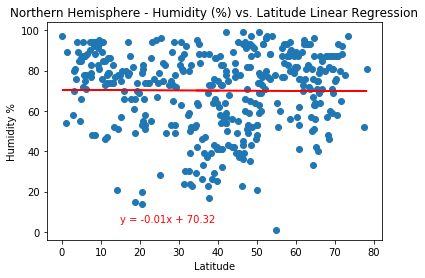

The r-squared is: -0.005638073850624925


<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Northern_HumidityvsLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

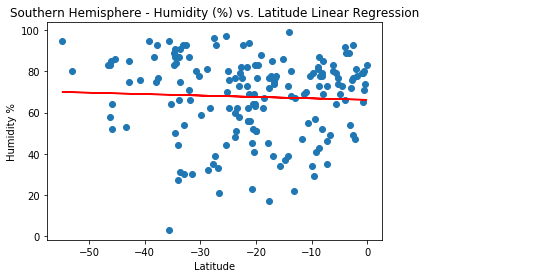

The r-squared is: -0.04554798094532407


<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Southern_HumidityvsLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

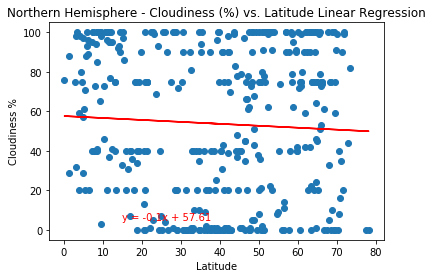

The r-squared is: -0.053119783424089136


<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Northern_CloudinessvsLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

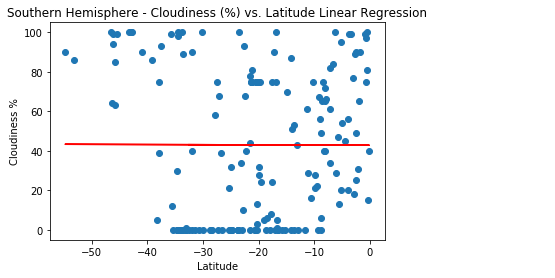

The r-squared is: -0.0030271068149893736


<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Southern_CloudinessvsLat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

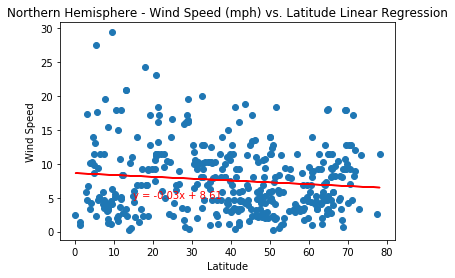

The r-squared is: -0.11041957224283855


<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Northern_WindspeedvsLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

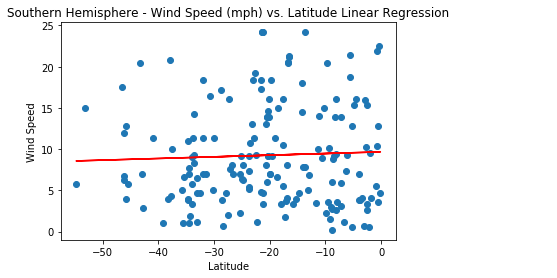

The r-squared is: 0.04203390237358765


<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

# print correlation coefficient under graph
corr = st.pearsonr(x_values, y_values)[0]
print(f"The r-squared is: {corr}")

plt.savefig("Images/LR_Southern_WindspeedvsLat.png")